# Tarea 4

## Ejercicio 4-1.

Graficar como convergen $4$ condiciones iniciales a las raiz real de $x^3 - x^2 - x - 1$ utilizando el método de Newton. Ésto básicamente es gráficar como se mueven los puntos $x_k$, luego grafiquen el error relativo a la raiz, es decir $(x_k-S)/S$, donde $S$ es la raíz. (Tip: Si tienen un arreglo con todas las $x_k$'s que arrojó el método, digamos list, prueben hacer directamente $(list-S)/S$ ).

In [70]:
Pkg.add("PyPlot")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [71]:
Pkg.add("SymPy")

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy


In [72]:
using PyPlot

In [73]:
function raiz(init)
    list=zeros(100)
    x=init
    for i in 1:100
        f=x*x*x-x*x-x-1
        df=3x*x-2x-1
        x=x-f/df;
        list[i]=x
    end
    return list
end

raiz (generic function with 1 method)

In [74]:
list1=raiz(0.01);
list2=raiz(0.001);
list3=raiz(0.0001);
list4=raiz(0.00001);
listn = 1: length(list4)

1:100

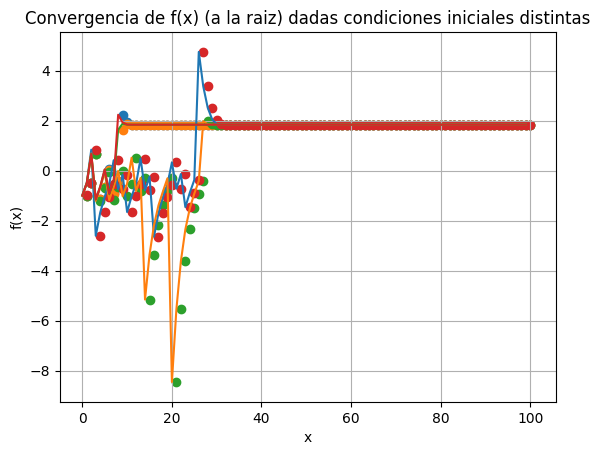

In [75]:
#yscale("symlog",linthreshy=0.05)
plot(real(list1));
plot(real(list2));
plot(real(list3));
plot(real(list4));

PyPlot.scatter(listn,list4)
PyPlot.scatter(listn,list3)
PyPlot.scatter(listn,list2)
PyPlot.scatter(listn,list1)
xlabel("x")
ylabel("f(x)")
title("Convergencia de f(x) (a la raiz) dadas condiciones iniciales distintas")
grid("on")
show();

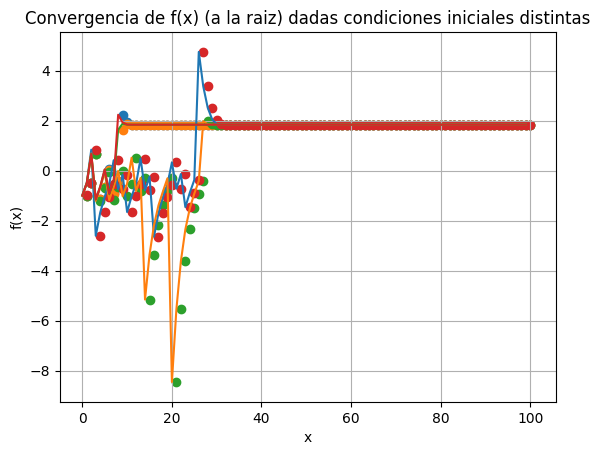

In [76]:
#yscale("symlog", linthreshy=0.05)
plot(real(list1))
plot(real(list2))
plot(real(list3))
plot(real(list4))
PyPlot.scatter(listn,list4)
PyPlot.scatter(listn,list3)
PyPlot.scatter(listn,list2)
PyPlot.scatter(listn,list1)

xlabel("x")
ylabel("f(x)")
title("Convergencia de f(x) (a la raiz) dadas condiciones iniciales distintas")
grid("on")
show();


Grafiquemos la relación de la raiz, es decir,  el error relativo a la raiz, es decir: $$\frac{x_k-S}{S}$$

Llamemos otra lista como la que sigue;

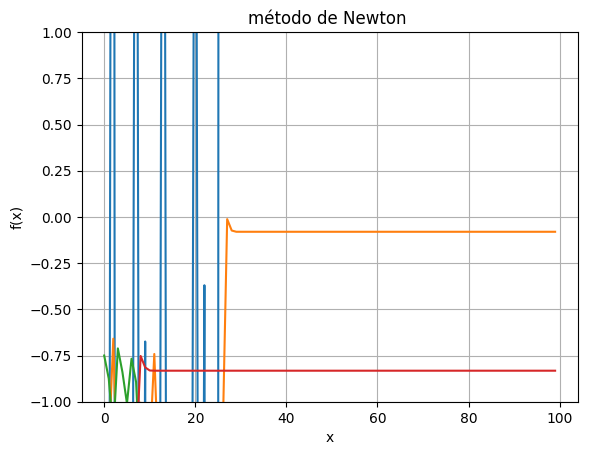

In [77]:
List5=(list1+0.1)/0.1;
List6=(list2-2)/2;
List7=(list3+4)/-4;
List8=(list4-6)/5;

xlabel("x")
ylabel("f(x)")
title( "método de Newton ")
grid("on")
plot(real(List5))
plot(real(List6))
plot(real(List7))
plot(real(List8))

ylim(-1,1);


### Método de Bisección

In [78]:
function Biseccion(a,b)   
    p=(a+b)/2
    f(x)=x^3-x^2-x-1
    for i in 1:100
        if f(a)*f(p)>0
            a=p
        end
        if f(b)*f(p)>0
            b=p
        end
        p=(a+b)/2
    end
    return p,f(p)
end;    

In [79]:
Biseccion(0,3)

(1.839286755214161, -1.3322676295501878e-15)

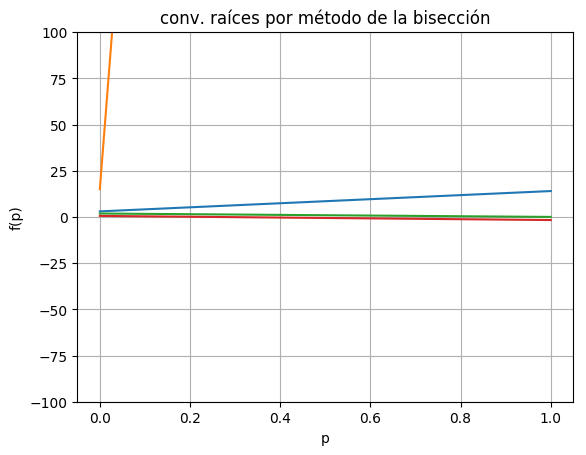

In [83]:
list9= Biseccion(2, 4);
list10= Biseccion(10, 20);
list11= Biseccion(-30, 40);
list12= Biseccion(1, 0.1);

xlabel("p")
ylabel("f(p)")
title("conv. raíces por método de la bisección")
grid("on")
plot(list9)
plot(list10)
plot(list11)
plot(list12)

ylim(-100,100)

show();

### Implementación del método de Newton para funciones arbitrarias 

In [81]:

Pkg.add("SymPy")

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy


In [82]:
using SymPy;

In [53]:
#Proponiendo la función visto en clase
function metodo(f,derivada,inicial)
      #x=Sym("x")
    list=zeros(Complex64,30);
    j=inicial;
    for i in 1:30
            #@show [j]
        j=j-f(j)/derivada(j);
        list[i]=j;
    end
    
    return j
end;

In [54]:
#Veamos que funciona como usando la funcion de los ejercicios anteriores
f(x)=x^3-x^2-x-1
derivada(x)=3x^2-2x-1

derivada (generic function with 1 method)

In [57]:
metodo(f,derivada,0.1)

1.8392867552141612

In [58]:
f(ans) #Si es raiz

2.220446049250313e-16

Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un rango amplio de condiciones iniciales, por ejemplo costruido con linspace,

In [59]:
function  metodo2(a,b) #Método,de,Newton
    x=a:b # array (linspace)
    n=b-a
    out=zeros(n)
    for i in 1:n
    out[i]=metodo(f, derivada, x[i]) 
    end
return out
end

metodo2 (generic function with 1 method)

In [63]:
#Evaluando en nuestro intervalo 
metodo2(3,20)

17-element Array{Float64,1}:
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929

Crear la misma rutina, pero que esta vez solo reciba un rango amplio de condiciones iniciales (objetos linspace) y que revise el arreglo despues de 200 iteraciones y solo tome las raices diferentes hasta cierto $\epsilon$. 

Tomando un intervalo (el linspace) definido por (a,b) y e=epsilon y definamos el M.Newton.

In [64]:
function metodo3(a,b,e)
    lista=metodo2(a,b)
    t=[]
    for i in 1:length(lista)
        iteraciones=0
        for j in 1:length(t)
            if lista[i]>t[j]+e
                iteraciones=iteraciones+1
            end
            if lista[i]<iteraciones[j]-e
                iteraciones=iteraciones+1
            end
        end
        if iteraciones==length(t)
            push!(t,lista[i])
        end
    end
    return t
end

metodo3 (generic function with 1 method)

In [65]:
metodo3(5,2000,0.000000000000000000001) #epsilon=e=10⁻(10)

1-element Array{Any,1}:
 1.83929

In [86]:
#Ahora hagamos esto pero con una función que solo necesite la función a evaluar más la condición inicial

#Declaramos la función metodo_newton, las variables a declarar son f,df funciones y x0 condicion inicial
function metodo_newton_funcion(f,x0)
    x=symbols("x")
    df=diff(f(x),x)
    g=lambdify(df,[x]);
    h(x)=f(x)/g(x)
    n(x)=x-h(x)
    a=n(x0)
    for i in 1:200
        a=n(a)
    end
    return a
end

metodo_newton_funcion (generic function with 1 method)

In [87]:
f(x)=x^3-x^2-x-1
metodo_newton_funcion(f,2)

1.8392867552141612